In [1]:
import pandas as pd
import numpy as np
import talib
from futuquant import OpenQuoteContext

from matplotlib import rc
rc('mathtext', default='regular')
import seaborn as sns
sns.set_style('white')


def get_data():
    quote_ctx = OpenQuoteContext(host='192.168.254.202', port=11111)

    # quote_ctx.get_market_snapshot()

    history_data = quote_ctx.get_history_kline("SH.600570", start='2018-7-20', ktype='K_DAY')
    
    data_frame = None
    if history_data[0] != -1:
        data_frame = pd.DataFrame(history_data[1])
        
    quote_ctx.close()
    return data_frame

dw = get_data()
print(dw)








2019-02-19 18:18:03,680 [open_context_base.py] _socket_reconnect_and_wait_ready:207: Start connecting: host=192.168.254.202; port=11111;
2019-02-19 18:18:03,683 [open_context_base.py] on_connected:289: Connected : conn_id=1; 
2019-02-19 18:18:03,686 [open_context_base.py] _handle_init_connect:378: InitConnect ok: conn_id=1; info={'server_version': 103, 'login_user_id': 11832306, 'conn_id': 11702443965905931433, 'conn_key': 'A18CBCE7C86F679F', 'keep_alive_interval': 10};


          code             time_key       open      close       high  \
0    SH.600570  2018-07-20 00:00:00  50.570000  52.139999  52.500000   
1    SH.600570  2018-07-23 00:00:00  52.090000  53.509998  54.389999   
2    SH.600570  2018-07-24 00:00:00  53.500000  53.869999  55.250000   
3    SH.600570  2018-07-25 00:00:00  54.009998  53.799999  54.980000   
4    SH.600570  2018-07-26 00:00:00  53.689999  52.580002  53.950001   
5    SH.600570  2018-07-27 00:00:00  52.500000  52.029999  52.840000   
6    SH.600570  2018-07-30 00:00:00  52.000000  50.970001  52.820000   
7    SH.600570  2018-07-31 00:00:00  50.799999  51.160000  51.529999   
8    SH.600570  2018-08-01 00:00:00  51.369999  50.910000  52.099998   
9    SH.600570  2018-08-02 00:00:00  50.599998  49.279999  50.790001   
10   SH.600570  2018-08-03 00:00:00  48.880001  48.160000  49.490002   
11   SH.600570  2018-08-06 00:00:00  48.340000  47.500000  48.639999   
12   SH.600570  2018-08-07 00:00:00  47.500000  48.459999  48.50

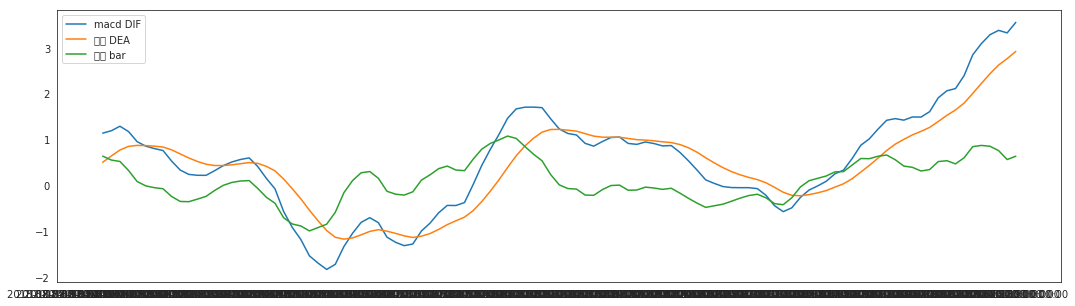

In [2]:
import matplotlib.pyplot as plt

df = talib.MACD(dw['last_close'], fastperiod=12, slowperiod=26, signalperiod=9)

fig = plt.figure(figsize=[18,5])
plt.plot(dw['time_key'],df[0],label='macd DIF') #差离值 EMA12-EMA26
plt.plot(dw['time_key'],df[1],label='信号 DEA')  #讯号线 根据DIF 算出9天的指数移动平均值EMA(DIF9)
plt.plot(dw['time_key'],df[2],label='差值 bar') #DIF与DEM的差
plt.legend(loc='best')

In [3]:
a = df[0].tolist()
b = df[1].tolist()
c = dw['time_key'].tolist()
factor_macd = pd.DataFrame({'DIF': a, 'DEA': b, 'time_key': c})

In [7]:
factor_macd


,DIF,DEA,time_key
0,NaN,NaN,2018-07-20 00:00:00
1,NaN,NaN,2018-07-23 00:00:00
2,NaN,NaN,2018-07-24 00:00:00
3,NaN,NaN,2018-07-25 00:00:00
4,NaN,NaN,2018-07-26 00:00:00
5,NaN,NaN,2018-07-27 00:00:00
6,NaN,NaN,2018-07-30 00:00:00
7,NaN,NaN,2018-07-31 00:00:00
8,NaN,NaN,2018-08-01 00:00:00
9,NaN,NaN,2018-08-02 00:00:00
